In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
%matplotlib inline

In [2]:
tf.__version__

'1.12.0'

# Download MNIST

In [4]:
mnist = input_data.read_data_sets("data/", one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [5]:
def print_np(x):
    print(f"shape is {x.shape}")
    print(f"shape is {x}")

In [10]:
print("##mnist train images")
print_np(mnist.train.images)
print("##mnist train labels")
print_np(mnist.train.labels)

##mnist train images
shape is (55000, 784)
shape is [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
##mnist train labels
shape is (55000, 10)
shape is [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [11]:
print("##mnist test images")
print_np(mnist.test.images)
print("##mnist test labels")
print_np(mnist.test.labels)

##mnist test images
shape is (10000, 784)
shape is [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
##mnist test labels
shape is (10000, 10)
shape is [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [14]:
print("##mnist validation images")
print_np(mnist.validation.images)
print("##mnist validation labels")
print_np(mnist.validation.labels)

##mnist validation images
shape is (5000, 784)
shape is [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
##mnist validation labels
shape is (5000, 10)
shape is [[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


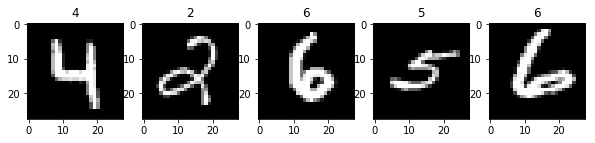

In [25]:
num_train = mnist.train.images.shape[0]
rand_mask = np.random.randint(num_train,size = 5)

fig, ax = plt.subplots(1,5, figsize=(10, 3))
for i,idx in enumerate(rand_mask):
    img = mnist.train.images[idx]
    img_label = mnist.train.labels[idx]
    
    reshaped_img = np.reshape(img,(28,28))
    ax[i].imshow(reshaped_img, cmap=plt.get_cmap("gray"))
    ax[i].set_title(img_label.argmax(0))

In [26]:
img_label

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

# Get random mini batch

In [28]:
ntrain = 10
randindices = np.random.permutation(ntrain)
randindices

array([1, 2, 3, 4, 6, 9, 7, 0, 8, 5])

# Then, Select Minibatch

In [31]:
ntrain = 10
nbatch = 4
nepoch = ntrain // nbatch +1

for i in range(nepoch):
    currindices = randindices[i*nbatch:(i+1)*nbatch]
    ## This is like shuffle without shuffling pristine train data
    xbatch = mnist.train.images[currindices]
    ybatch = mnist.train.labels[currindices]
    print(f"Xbatch's shape: {xbatch.shape}")
    print(f"label's shape: {ybatch.shape}")

Xbatch's shape: (4, 784)
label's shape: (4, 10)
Xbatch's shape: (4, 784)
label's shape: (4, 10)
Xbatch's shape: (2, 784)
label's shape: (2, 10)
